![Time_Series_Header](https://raw.githubusercontent.com/satishgunjal/images/master/Time_Series_Header_1000x690.png)

# Table of Contents

* [What is Time Series](#1)
  - [Time Series Characteristics](#2)
    + [Trend](#3) 
    + [Seasonality](#4)
    + [Irregularities](#5)
    + [Cyclicity](#6)
* [Time Series Analysis](#7)
  - [Decomposition of Time Series](#8)
  - [Stationary Data](#9)
  - [Test for Stationarity](#10)
    + [Rolling Statistics](#11)
    + [Augmented Dickey Fuller Test](#12)
  - [Convert Non Stationary Data to Stationary Data](#13)
    + [Differencing](#14)
    + [Transformation](#15)
    + [Moving Average](#16)
      + [Weighted Moving Averages(WMA)](#17)
      + [Centered Moving Averages(CMS)](#18)
      + [Trailing Moving Averages(TMA)](#19)
  - [Correlation](#20)
    + [ACF: Auto Correlation Function](#21)
    + [PACF: Partial Auto Correlation Function](#22)
* [Time Series Forecasting](#23)
  - [Models Used For Time Series Forecasting](#24)
  - [ARIMA](#25)
    + [Auto-Regressive (AR) Model](#26)
    + [Integration(I)](#27)
    + [Moving Average (MA) Model](#28)
* [Python Example](#29)
  - [Import The Library](#30)
  - [Understanding The Data](#31)
  - [Time Series Characteristics](#32)
  - [Analysis](#33)
  - [Forecasting](#34)

# What is Time Series <a id ="1"></a>
Any data recorded with some fixed interval of time is called as time series data. This fixed interval can be hourly, daily, monthly or yearly. e.g. hourly temp reading, daily changing fuel prices, monthly electricity bill, annul company profit report etc. In time series data, time will always be independent variable and there can be one or many dependent variable. 

Sales forecasting time series with shampoo sales for every month will look like this, 

![Shampoo_Sales](https://raw.githubusercontent.com/satishgunjal/images/master/Shampoo_Sales.png)

In above example since there is only one variable dependent on time so its called as univariate time series. If there are multiple dependent variables, then its called as multivariate time series.

Objective of time series analysis is to understand how change in time affect the dependent variables and accordingly predict values for future time intervals.


## Time Series Characteristics <a id ="2"></a>
Mean, standard deviation and seasonality defines different characteristics of the time series. 

![Time_Series_Characteristics](https://raw.githubusercontent.com/satishgunjal/images/master/Time_Series_Characteristics.png)

Important characteristics of the time series are as below

### Trend <a id ="3"></a>
Trend represent the change in dependent variables with respect to time from start to end. In case of increasing trend dependent variable will increase with time and vice versa. It's not necessary to have definite trend in time series, we can have a single time series with increasing and decreasing trend. In short trend represent the varying mean of time series data.

![Trend](https://raw.githubusercontent.com/satishgunjal/images/master/Trend.png)

### Seasonality <a id ="4"></a>
If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events. For example every year warm cloths sales increases just before winter season. So seasonality represent the data variations at fixed intervals.

![Seasonality](https://raw.githubusercontent.com/satishgunjal/images/master/Seasonality.png)

### Irregularities <a id ="5"></a>
This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc. For example because of COVID-19 pandemic there is huge demand for hand sanitizers and masks.

![Irregularities](https://raw.githubusercontent.com/satishgunjal/images/master/Irregularities.png)

### Cyclicity <a id ="6"></a>
Cyclicity occurs when observations in the series repeats in random pattern. Note that if there is any fixed pattern then it becomes seasonality, in case of cyclicity observations may repeat after a week, months or may be after a year. These kinds of patterns are much harder to predict.

![Cyclicity](https://raw.githubusercontent.com/satishgunjal/images/master/Cyclicity.png)

Time series data which has above characteristics is called as 'Non-Stationary Data'. For any analysis on time series data we must convert it to 'Stationary Data'

The general guideline is to estimate the trend and seasonality in the time series, and then make the time series stationary for data modeling. In data modeling step statistical techniques are used for time series analysis and forecasting. Once we have the predictions, in the final step forecasted values converted into the original scale by applying trend and seasonality constraints back.


# Time Series Analysis <a id ="7"></a>
As name suggest its analysis of the time series data to identify the patterns in it. I will briefly explain the different techniques and test for time series data analysis.

## Decomposition of Time Series <a id ="8"></a>
Time series decomposition helps to deconstruct the time series into several component like trend and seasonality for better visualization of its characteristics. Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data

![Decomposition_of_Time_Series](https://raw.githubusercontent.com/satishgunjal/images/master/Decomposition_of_Time_Series.png)

## Stationary Data <a id ="9"></a>
For accurate analysis and forecasting trend and seasonality is removed from the time series and converted it into stationary series.
Time series data is said to be stationary when statistical properties like mean, standard deviation are constant and there is no seasonality. In other words statistical properties of the time series data should not be a function of time.

![Stationarity](https://raw.githubusercontent.com/satishgunjal/images/master/Stationarity.png)

## Test for Stationarity <a id ="10"></a>
Easy way is to look at the plot and look for any obvious trend or seasonality. While working on real world data we can also use more sophisticated methods like rolling statistic and Augmented Dickey Fuller test to check stationarity of the data. 

### Rolling Statistics <a id ="11"></a>
In rolling statistics technique we define a size of window to calculate the mean and standard deviation throughout the series. For stationary series mean and standard deviation shouldn't change with time.

### Augmented Dickey Fuller (ADF) Test <a id ="12"></a>
I won't go into the details of how this test works. I will concentrate more on how to interpret the result of this test to determine the stationarity of the series. ADF test will return 'p-value' and 'Test Statistics' output values.
* **p-value > 0.05**: non-stationary.
* **p-value <= 0.05**: stationary.
* **Test statistics**: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

## Convert Non-Stationary Data to Stationary Data <a id ="13"></a>
Accounting for the time series data characteristics like trend and seasonality is called as making data stationary. So by making the mean and variance of the time series constant, we will get the stationary data. Below are the few technique used for the same…

### Differencing <a id ="14"></a>
Differencing technique helps to remove the trend and seasonality from time series data. Differencing is performed by subtracting the previous observation from the current observation. The differenced data will contain one less data point than original data. So differencing actually reduces the number of observations and stabilize the mean of a time series.

```
difference = previous observation - current observation
```
After performing the differencing it's recommended to plot the data and  visualize the change. In case there is not sufficient improvement you can perform second order or even third order differencing.

### Transformation <a id ="15"></a>
A simple but often effective way to stabilize the variance across time is to apply a power transformation to the time series. Log, square root, cube root are most commonly used transformation techniques.
Most of the time you can pick the type of growth of the time series and accordingly choose the transformation method. For. e.g. A time series that has a quadratic growth trend can be made linear by taking the square root. In case differencing don't work, you may first want to use one of above transformation technique to remove the variation from the series. 

![Log_Transformation](https://raw.githubusercontent.com/satishgunjal/images/master/Log_Transformation.png)

### Moving Average <a id ="16"></a>
In moving averages technique, a new series is created by taking the averages of data points from original series. In this technique we can use two or more raw data points to calculate the average. This is also called as 'window width (w)'. Once window width is decided, averages are calculated from start to the end for each set of w consecutive values, hence the name moving averages. It can also be used for time series forecasting.

![Moving_Average](https://raw.githubusercontent.com/satishgunjal/images/master/Moving_Average.png)

#### Weighted Moving Averages(WMA) <a id ="17"></a>
WMA is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past. The WMA is obtained by multiplying each number in the data set by a predetermined weight and summing up the resulting values. There can be many techniques for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

#### Centered Moving Averages(CMS) <a id ="18"></a>
In a centered moving average, the value of the moving average at time t is computed by centering the window around time t and averaging across the w values within the window. For example, a center moving average with a window of 3 would be calculated as
  ```
  CMA(t) = mean(t-1, t, t+1)
  ```
  
CMA is very useful for visualizing the time series data
  
#### Trailing Moving Averages(TMA) <a id ="19"></a>
In trailing moving average, instead of averaging over a window that is centered around a time period of interest, it simply takes the average of the last w values. For example, a trailing moving average with a window of 3 would be calculated as:
 ```
 TMA(t) = mean(t-2, t-1, t)
 ```
 
 TMA are useful for forecasting.

## Correlation <a id ="20"></a>
* Most important point about values in time series is its dependence on the previous values.
* We can calculate the correlation for time series observations with previous time steps, called as lags.
* Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called an autocorrelation or serial correlation.
* To understand it better lets consider the example of fish prices. We will use below notation to represent the fish prices. 
    - P(t)= Fish price of today
    - P(t-1) = Fish price of last month
    - P(t-2) =Fish price of last to last month
* Time series of fish prices can be represented as P(t-n),..... P(t-3), P(t-2),P(t-1), P(t)
* So if we have fish prices for last few months then it will be easy for us to predict the fish price for today (Here we are ignoring all other external factors that may affect the fish prices

All the past and future data points are related in time series and ACF and PACF functions help us to determine correlation in it.

### Auto Correlation Function (ACF) <a id ="21"></a>
* ACF tells you how correlated points are with each other, based on how many time steps they are separated by.
* Now to understand it better lets consider above example of fish prices. Let's try to find the correlation between fish price for current month P(t) and two months ago P(t-2). Important thing to note that, fish price of two months ago can directly affect the today's fish price or it can indirectly affect the fish price through last months price P(t-1)
* So ACF consider the direct as well indirect effect between the points while determining the correlation

### Partial Auto Correlation Function (PACF) <a id ="22"></a>
* Unlike ACF, PACF only consider the direct effect between the points while determining the correlation
* In case of above fish price example PACF will determine the correlation between fish price for current month P(t) and two months ago P(t-2) by considering only P(t) and P(t-2) and ignoring P(t-1)


# Time Series Forecasting <a id ="23"></a>
Forecasting refers to the future predictions based on the time series data analysis. Below are the steps performed during time series forecasting

* Step 1: Understand the time series characteristics like trend, seasonality etc
* Step 2: Do the analysis and identify the best method to make the time series stationary
* Step 3: Note down the transformation steps performed to make the time series stationary and make sure that the reverse transformation of data is possible to get the original scale back
* Step 4: Based on data analysis choose the appropriate model for time series forecasting
* Step 5: We can assess the performance of a model by applying simple metrics such as residual sum of squares(RSS). Make sure to use whole data for prediction.
* Step 6: Now we will have an array of predictions which are in transformed scale. We just need to apply the reverse transformation to get the prediction values in original scale.
* Step 7: At the end we can do the future forecasting and get the future forecasted values in original scale.

## Models Used For Time Series Forecasting <a id ="24"></a>
* Autoregression (AR)
* Moving Average (MA)
* Autoregressive Moving Average (ARMA)
* Autoregressive Integrated Moving Average (ARIMA)
* Seasonal Autoregressive Integrated Moving-Average (SARIMA)
* Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
* Vector Autoregression (VAR)
* Vector Autoregression Moving-Average (VARMA)
* Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
* Simple Exponential Smoothing (SES)
* Holt Winter’s Exponential Smoothing (HWES)

Next part of this article we are going to analyze and forecast air passengers time series data using ARIMA model. Brief introduction of ARIMA model is as below

## ARIMA <a id ="25"></a>
* ARIMA stands for Auto-Regressive Integrated Moving Averages. It is actually a combination of AR and MA model. 
* ARIMA has three parameters 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part. 

### Auto-Regressive (AR) Model: <a id ="26"></a>
* As the name indicates, its the regression of the variables against itself. In this model linear combination of the past values are used to forecast the future values. 
* To figure out the order of AR model we will use PACF function

### Integration(I): <a id ="27"></a>
* Uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* Most of the time value of d = 1, means first order of difference.

### Moving Average (MA) Model: <a id ="28"></a>
* Rather than using past values of the forecast variable in a regression, a moving average model uses linear combination of past forecast errors
* To figure out the order of MA model we will use ACF function

# Python Example <a id ="29"></a>
We have a monthly time series data of the air passengers from 1 Jan 1949 to 1 Dec 1960. Each row contains the air passenger number for a month of that particular year. Objective is to build a model to forecast the air passenger traffic for future months.

## Import The Library <a id ="30"></a>
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn: It’s a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
* statsmodels: Using statsmodels module classes and functions for time series analysis and forecasting 
   * adfuller: Augmented Dickey-Fuller
   * ACF: Auto Correlation Function
   * PACF: Partial Auto Correlation Function
   * ARIMA: Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
   * sm.tsa.seasonal.seasonal_decompose: For decomposition of time series
* rcParams: To change the matplotlib properties like figure size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [2]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Understanding The Data <a id ="31"></a>
* Dataframe 'df' contains the time series data. There are two columns 'Month' and 'Passengers'. Month column contains the value of month in that year and passenger column contains the number of air passenger for that particular month.
* As you may have noticed 'Month' column datatype is 'Object', so we are going to convert it to 'datetime'
* To make plotting easier, we set the index of pandas dataframe 'df' to the 'Month' column so that it will act as x-axis & Passenger column as y-axis

In [4]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Passengers    int64
dtype: object


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Time Series Characteristics <a id ="32"></a>

### Trend

Text(0.5, 1.0, 'Trend of the Time Series')

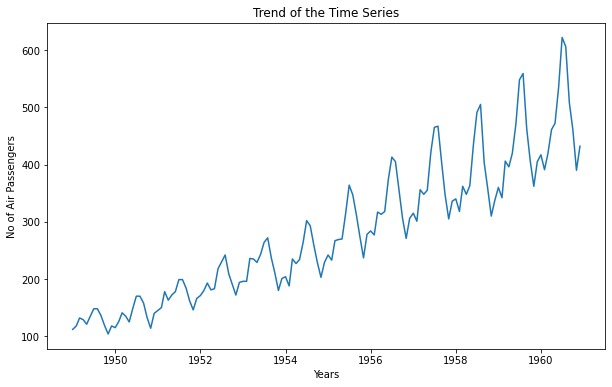

In [5]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

As you can see from above plot there is upward trend of number of passenger for every year. 

### Variance
In above graph you can clearly see that the variation is also increasing with the level of the series. You will see in the later part of this exercise how we handle the variance to increase the stationarity of the series.

### Seasonality
We can also see the graph going up and down at regular interval, that is the sign of seasonality. Let's plot the graph for few months to visualize for seasonality.

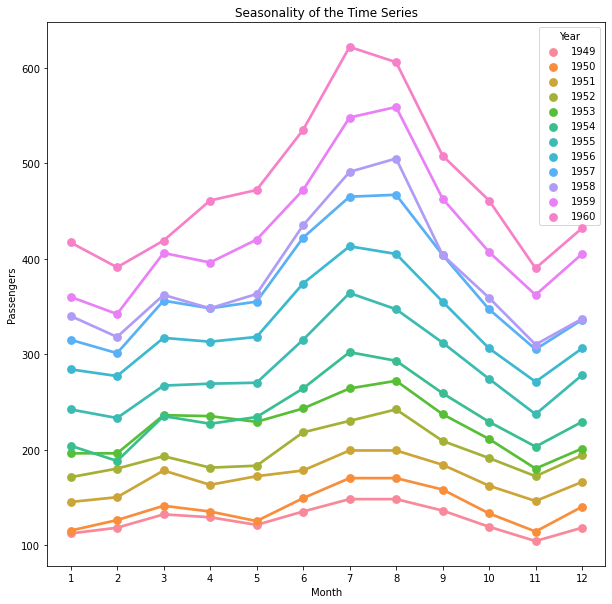

In [6]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

From above graph we can say that every year in month of July we observe maximum number of passengers and similarly minimum number of passenger in the month of November.

### Decomposition of Time Series
Let's now use the decomposition technique to deconstruct the time series data into several component like trend and seasonality for visualization of time series characteristics.

Here we are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns.

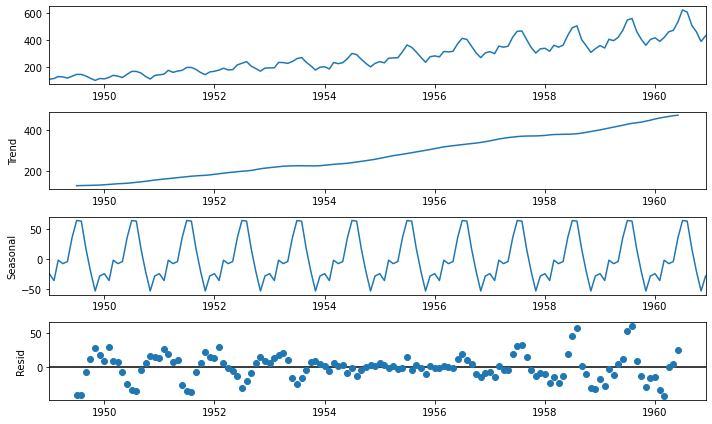

In [7]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Time Series Analysis <a id ="33"></a>
So our time series has variance, trend and seasonality characteristics. During our analysis we are going to try multiple techniques to make time series stationary and record the stationarity scores for each method. Finally, we will select the method, which is easy for inverse transformation easy and give best stationarity score.

### Check for Stationarity
We are going to use rolling statistics and Dickey-Fuller test to check the stationarity of the time series

In [8]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

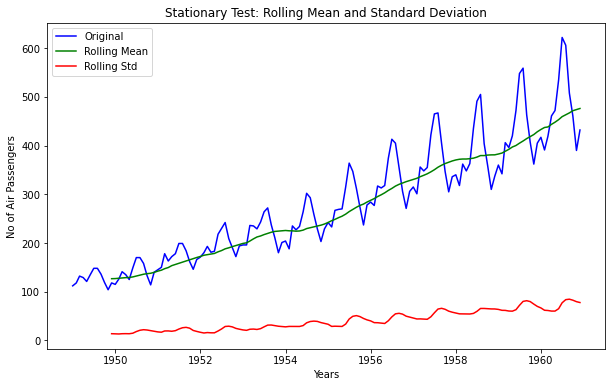

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
# Lets test the stationarity score with original series data
stationarity_test(df)

Though it's clear from visual observation that it's not a stationary series, but still lets have look at the rolling statistics and Duckey Fuller test results

* Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.
* Duckey Fuller Test: Test statistic is way more than the critical values.

### Convert Non-Stationary Data to Stationary Data
Let's first use the differencing technique to obtain the stationarity.

#### Differencing
To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

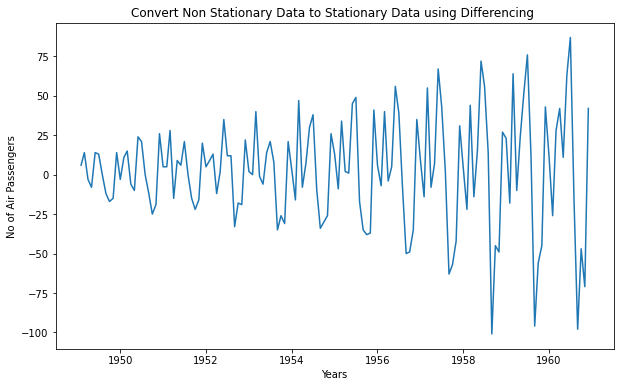

In [10]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the stationarity_test() to check the effectiveness of the 'Differencing' technique

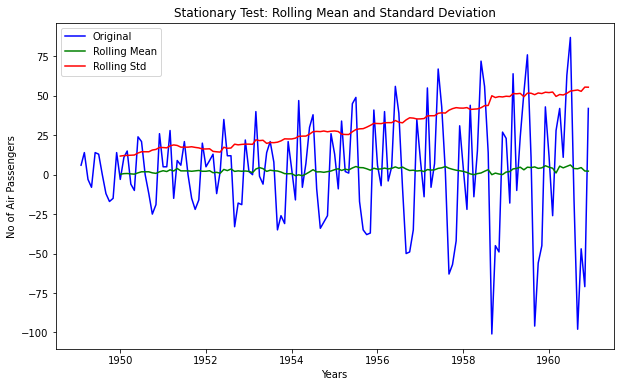

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

The rolling values appear to be varying slightly, and we can see there is slight upward trend in standard deviation. Also, the test statistic is smaller than the 10% critical but since p-value is greater than 0.05 it is not a stationary series.

Note that variance in the series is also affecting above results, which can be removed using transformation technique.

Let's also check with transformation technique


#### Transformation


Since variance is proportional to the levels, we are going to use the log transformation.

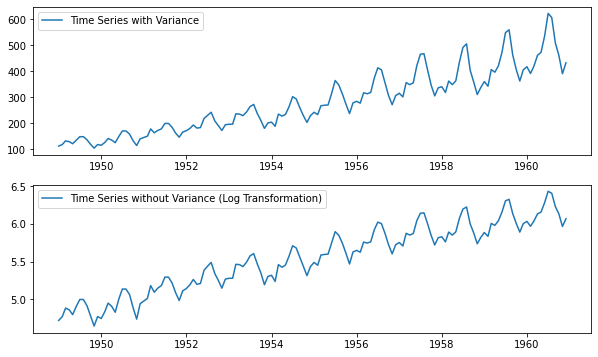

In [12]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

Since log transformation has removed the variance from series, lets use this transformed data hence forward. 
Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.
```
    df = exp(df_log)
```

Let cross-check the differencing method scores with this log transformed data again.

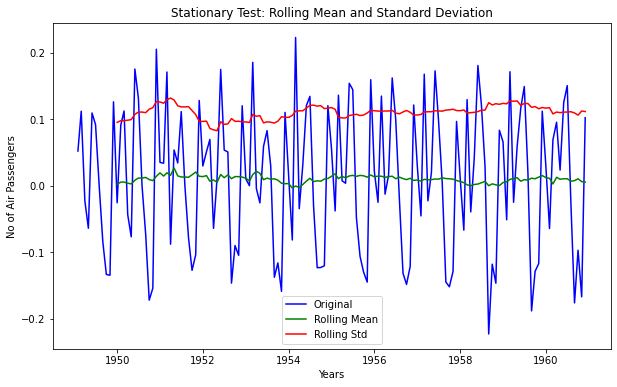

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [13]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.

Let's also check with Moving Average technique…

#### Moving Average

Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average. Window size = 12. Note that we are going to use Log transformed data.

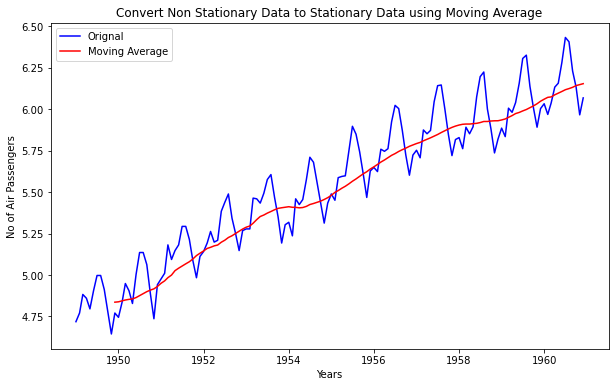

In [14]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

As you can see from above graph that data is more smooth without any variance. If we use the differencing technique with log transformed data and mean average data then we should get better stationarity scores

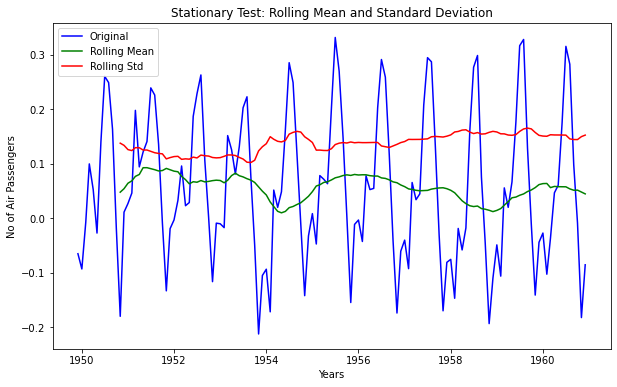

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [15]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

#### Weighted Moving Average (WMA)

Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

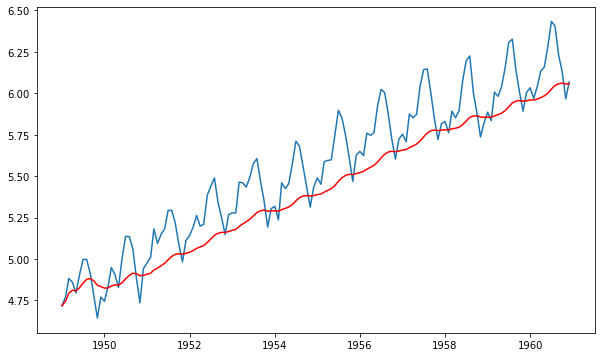

In [16]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

Notice that WMA follow's no of passenger values more closely than a corresponding Simple Moving Average which also results in more accurate trend direction. Now lets check, the effect of this on stationarity scores!

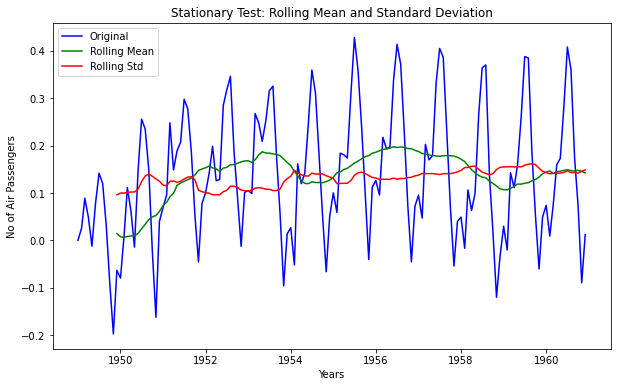

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

Test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

There is one more way to obtain better stationarity is by using the residual data from time series decomposition.

#### Decomposition of Time Series

Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.

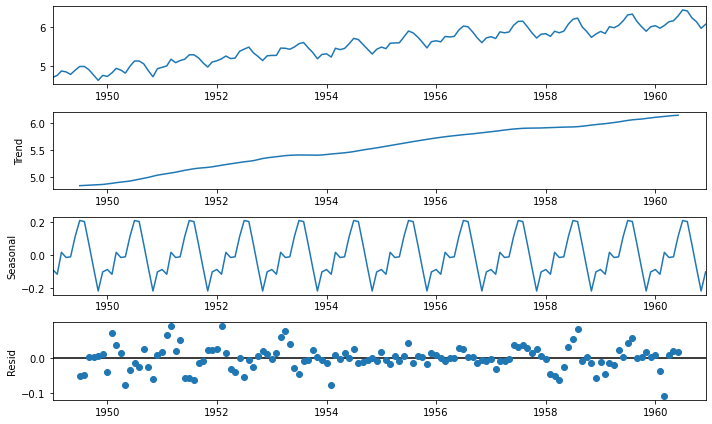

In [18]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

Here we can see that the trend and seasonality are separated out from log transformed data, and we can now check the stationarity of the residuals

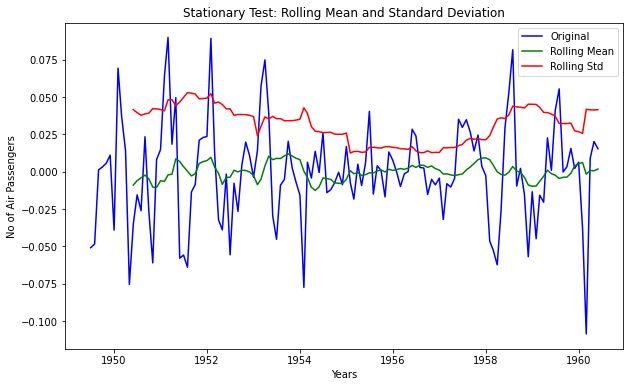

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [19]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value and p-value is almost 0. So this time series is very close to stationary. This concludes our time series analysis and data transformation to get the stationary series. Now we can start modeling it for forecast.

## Forecasting <a id ="34"></a>
* Though using residual values gives us very good results, but it's relatively difficult to add noise and seasonality back into predicted residuals in this case. 
* So we are going to make model on the time series(df_log_diff), where we have used log transformation and differencing technique. This is one of the most popular and beginner-friendly technique. As per our time series analysis 'df_log_diff' is not a perfectly stationary series, that's why we are going to use statistical models like ARIMA to forecast the data.
* Remember that ARIMA model uses three parameters, 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part. We are going to use d =1 but to find the value for p and q lets plot ACF and PACF.
* Note that since we are using d=1, first order of differencing will be performed on given series. Since first value of time series don't have any value to subtract from resulting series will have one less value from original series

### ACF and PACF Plots
* To figure out the order of AR model(p) we will use PACF function. p = the lag value where the PACF chart crosses the upper confidence interval for the first time
* To figure out the order of MA model(q) we will use ACF function. q = the lag value where the ACF chart crosses the upper confidence interval for the first time

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


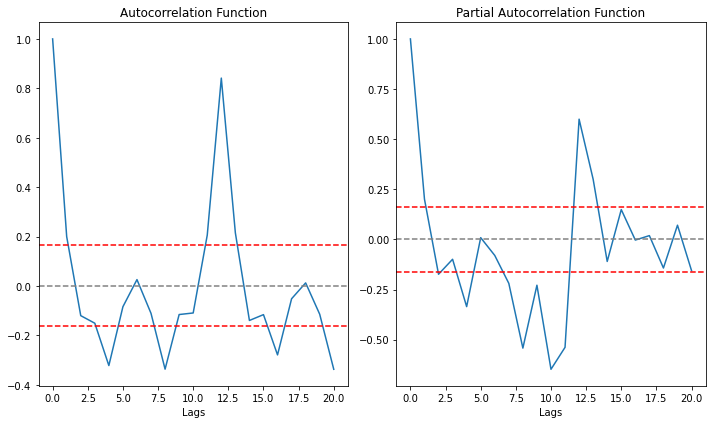

In [20]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above graph its clear that p=2 and q=2. Now we have the ARIMA parameters values, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS(Residual Sum of Square) metric for each. Please note that here RSS is for the values of residuals and not actual series.

### AR Model
Since 'q' is MA model parameter we will keep its value as '0'.

Text(0.5, 1.0, 'AR Model, RSS: 1.5023')

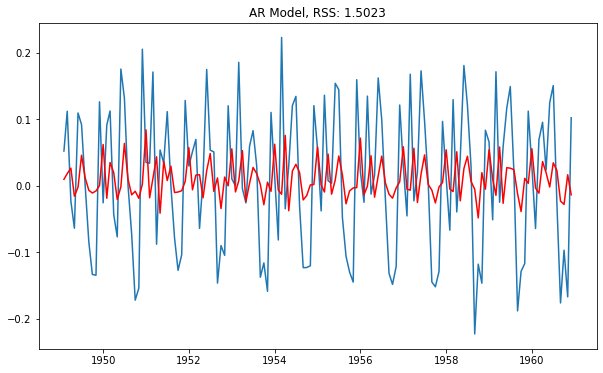

In [21]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')  
results_AR = model.fit(disp= -1)# If disp < 0 convergence information will not be printed
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log_diff['Passengers'])**2))

### MA Model
Since 'p' is AR model parameter we will keep its value as '0'.

Text(0.5, 1.0, 'MA Model, RSS: 1.4721')

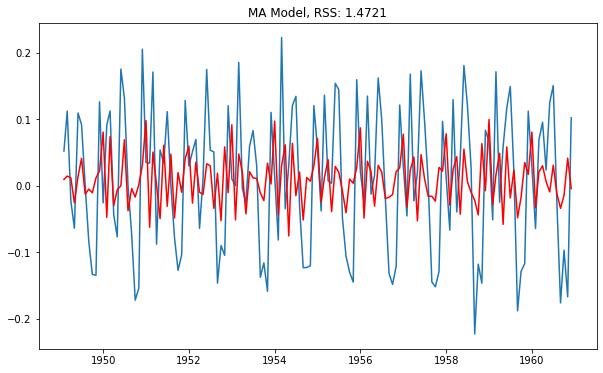

In [22]:
model = ARIMA(df_log, order=(0, 1, 2), freq = 'MS')  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff['Passengers'])**2))

### Combined Model

Text(0.5, 1.0, 'Combined Model, RSS: 1.0292')

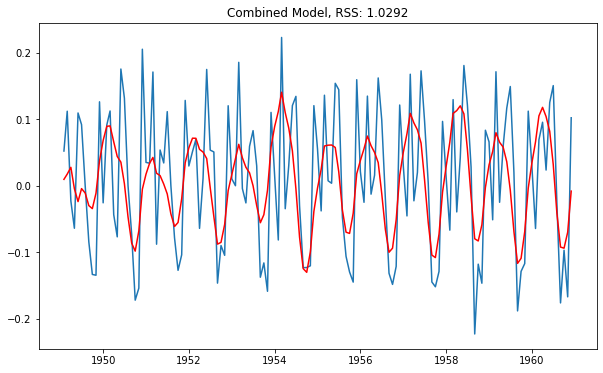

In [23]:
model = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Passengers'])**2))

Here we can see that the AR and MA models have almost the same RSS score but combined is significantly better. So we will go ahead with combined ARIMA model and use it for predictions.

### Prediction and Reverse Transformation
* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them

In [24]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  143


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove 'differencing transformation' from the prediction values we are going to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas cumsum() function for it.

In [25]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

Above values once added to the base number will completely remove the differencing transformation. For this, lets create a series with all values as base number and add the 'predictions_diff_cumsum' to it.

In [26]:
predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

So as of now we have removed the differencing transformation, now lets remove the log transformation to get the original scale back.

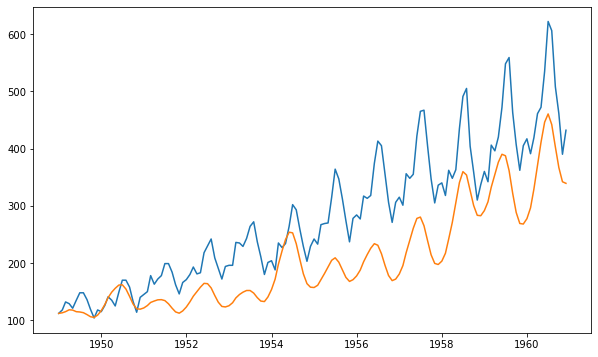

In [27]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

In [28]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Month,1949-01-01,1949-02-01,1949-03-01,1949-04-01,1949-05-01,1949-06-01,1949-07-01,1949-08-01,1949-09-01,1949-10-01,...,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
Passengers,112.0,118.000000,132.000000,129.000000,121.00000,135.000000,148.000000,148.000000,136.000000,119.000000,...,419.000000,461.000000,472.000000,535.00000,622.000000,606.0000,508.000000,461.00000,390.00000,432.000000
Predicted Values,112.0,113.078122,115.073414,118.301984,117.76836,114.988272,114.489518,113.239572,109.900647,106.177204,...,329.212533,370.428477,411.049835,446.08517,460.460698,441.8858,402.905304,366.75293,341.98426,339.216265


### Future Forecasting
* We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
* If we want to forecast for next 5 years or 60 months then, ‘end’ count will be >  144 + 60 = 204.
* We are going to use statsmodels plot_predict() method for it

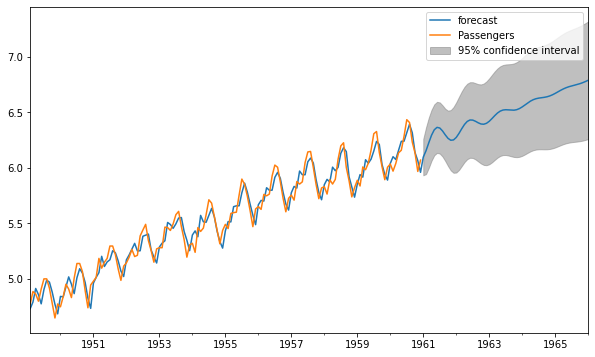

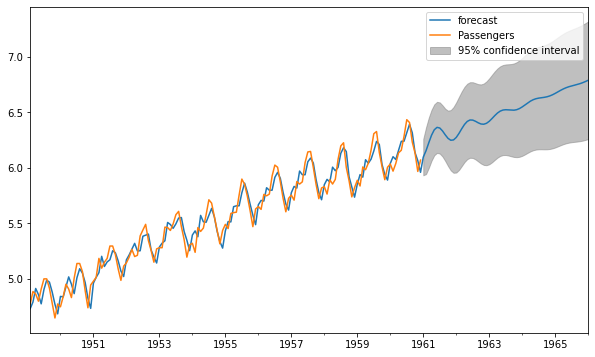

In [29]:
results_ARIMA.plot_predict(start = 1, end= 204) 

In [30]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Month'] = forecast_date_range

df_forecast[['Month', 'Forecast']]

,Month,Forecast
0,1961-01-01,443.870987
1,1961-02-01,470.038252
2,1961-03-01,504.935004
3,1961-04-01,540.454828
4,1961-05-01,567.730698
5,1961-06-01,580.328083
6,1961-07-01,577.002625
7,1961-08-01,561.938824
8,1961-09-01,542.384607
9,1961-10-01,525.566704


Reference material is as below. 
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
* https://maelfabien.github.io/statistics/TimeSeries3/#
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.kaggle.com/chirag19/time-series-analysis-with-python-beginner/notebook
* https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
* https://www.youtube.com/watch?v=gj4L2isnOf8&t=1167s
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
* https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621
* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
